In [2]:
import pandas as pd

# Load the dataset from an Excel file
df = pd.read_excel(r'C:\Users\Dell\Downloads\heart_disease.xlsx')

# Display the first few rows of the dataframe
print(df.head())


        age                                       Age in years
0    Gender                       Gender ; Male - 1, Female -0
1        cp                                    Chest pain type
2  trestbps                             Resting blood pressure
3      chol                                cholesterol measure
4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           0 non-null      float64
 1   Age in years  0 non-null      float64
dtypes: float64(2)
memory usage: 324.0 bytes
None
       age  Age in years
count  0.0           0.0
mean   NaN           NaN
std    NaN           NaN
min    NaN           NaN
25%    NaN           NaN
50%    NaN           NaN
75%    NaN           NaN
max    NaN           NaN
age             12
Age in years    12
dtype: int64


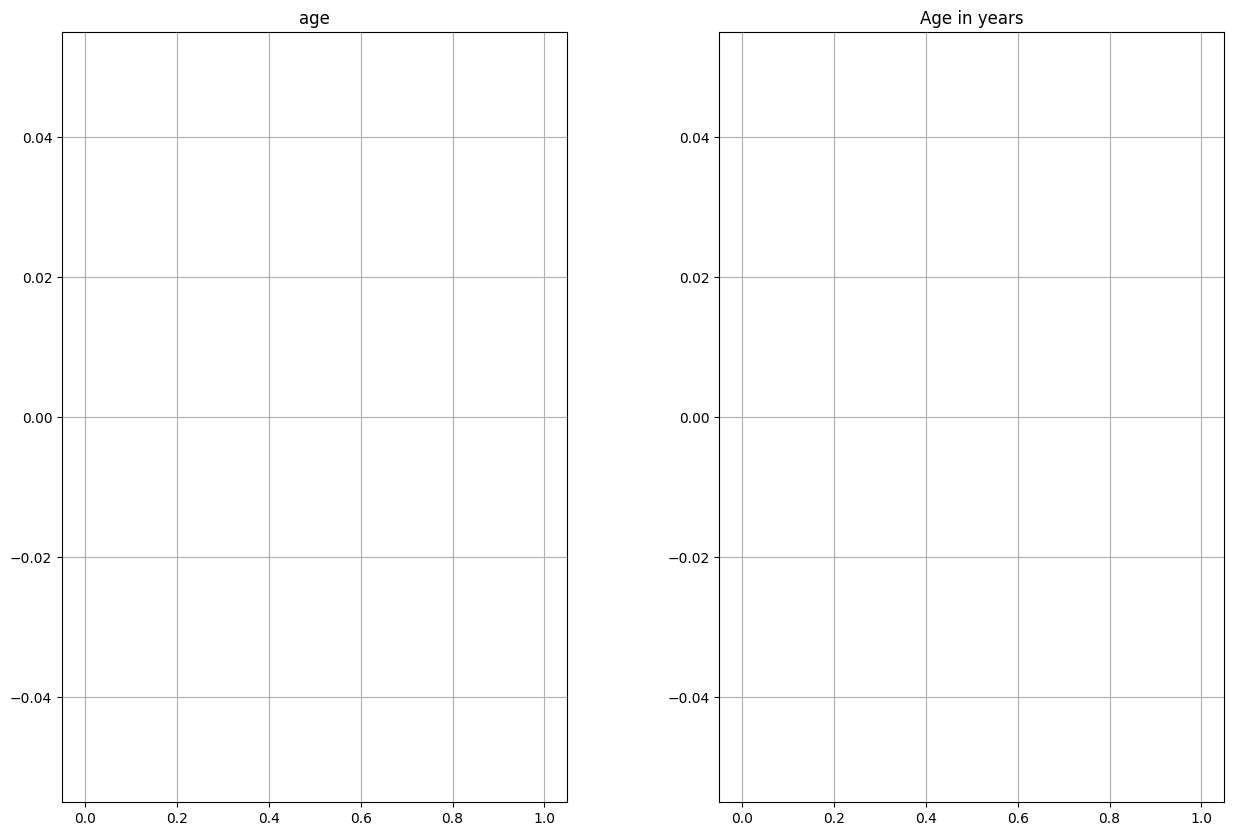

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


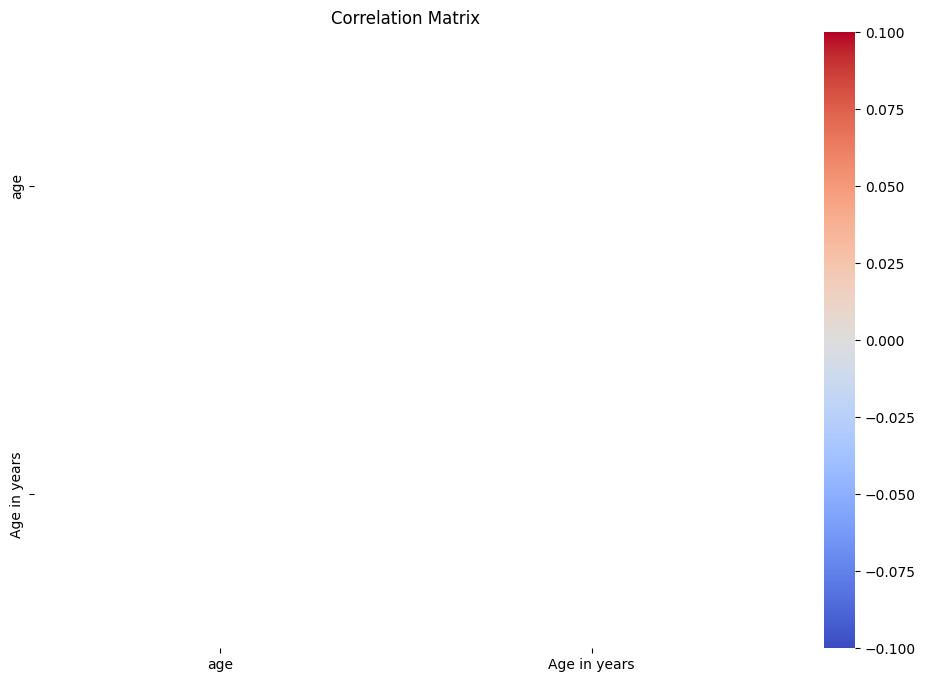

In [10]:
#Exploratory Data Analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display basic information
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualizations
# Histograms
df.hist(bins=30, figsize=(15, 10))
plt.show()


# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [11]:
#Feature engineering
# Fill missing values if necessary
df.fillna(df.median(), inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)  # One-hot encoding


In [13]:
print(df.columns)


Index(['age', 'Age in years'], dtype='object')


In [5]:
print(df.dtypes)


age             object
Age in years    object
dtype: object


In [ ]:
#Common Hyperparameters of Decision Tree Models:
#max_depth: Limits the depth of the tree to prevent overfitting. A deeper tree may capture more detail but can also lead to overfitting.
#min_samples_split: The minimum number of samples required to split an internal node. Higher values can prevent creating nodes that only contain a few samples, which may improve generalization.
#criterion: This determines the function to measure the quality of a split (e.g., 'gini' for Gini impurity or 'entropy' for information gain). Different criteria can lead to different tree structures.

In [ ]:
#Difference Between Label Encoding and One-Hot Encoding:

#Label Encoding: Converts categorical values into integers. For example, if a column has values ['red', 'green', 'blue'], it may convert them to [0, 1, 2]. This method introduces an ordinal relationship that might not exist.
#One-Hot Encoding: Creates binary columns for each category. For the same example, it would create three columns (is_red, is_green, is_blue) with binary values. This avoids introducing any ordinal relationship, making it more suitable for categorical variables in most machine learning models.

In [4]:
print(df.dtypes)


age             object
Age in years    object
dtype: object


In [5]:
# Convert 'age' and 'Age in years' to numeric, coercing errors to NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['Age in years'] = pd.to_numeric(df['Age in years'], errors='coerce')

# Check for NaN values after conversion
print(df.isnull().sum())


age             12
Age in years    12
dtype: int64


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load the dataset from an Excel file
df = pd.read_excel(r'C:\Users\Dell\Downloads\heart_disease.xlsx')

# Display the first few rows of the dataframe
print(df.head())

# Check unique values in 'age' and 'Age in years' before conversion
print("Unique values in 'age':", df['age'].unique())
print("Unique values in 'Age in years':", df['Age in years'].unique())

# Convert 'age' and 'Age in years' columns to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['Age in years'] = pd.to_numeric(df['Age in years'], errors='coerce')

# Check for any NaN values after conversion
print(df.isnull().sum())

# Drop rows with NaN values
df.dropna(inplace=True)

# Check the shape of the DataFrame after dropping NaNs
print(f"Shape of DataFrame after dropping NaNs: {df.shape}")

# Define features (X) and target variable (y)
X = df.drop('Age in years', axis=1)  # Drop the target column
y = df['Age in years']  # Target variable

# Convert categorical variables using one-hot encoding (if any remain)
X = pd.get_dummies(X, drop_first=True)

# Check the shape of X and y
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

# Ensure there are enough samples to split
if X.shape[0] > 0 and y.shape[0] > 0:
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Implement Decision Tree Regressor
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Evaluation
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    print(f'Mean Absolute Error: {mae}')
    print(f'Mean Squared Error: {mse}')
else:
    print("Not enough data to train the model.")


        age                                       Age in years
0    Gender                       Gender ; Male - 1, Female -0
1        cp                                    Chest pain type
2  trestbps                             Resting blood pressure
3      chol                                cholesterol measure
4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...
Unique values in 'age': ['Gender' 'cp' 'trestbps' 'chol' 'fbs' 'restecg' 'thalch' 'exang'
 'oldpeak' 'slope' 'thal' 'num']
Unique values in 'Age in years': ['Gender ; Male - 1, Female -0' 'Chest pain type' 'Resting blood pressure'
 'cholesterol measure'
 '(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)'
 "ecg observation at resting condition,   -- Value 0: normal\n        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)\n        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria"
 'maximum heart rate achieved' '

In [6]:
#Handle missing values
df.fillna(df.median(), inplace=True)  # Fill NaNs with median for numeric columns


In [15]:
import pandas as pd

# Load the dataset
df = pd.read_excel(r'C:\Users\Dell\Downloads\heart_disease.xlsx', header=1)

# Display the first few rows and the column names
print(df.head())
print("Column names:", df.columns.tolist())  # Print column names as a list for clarity

# Attempt to convert columns to numeric
try:
    df['age'] = pd.to_numeric(df['age'], errors='coerce')
    df['Age in years'] = pd.to_numeric(df['Age in years'], errors='coerce')
except KeyError as e:
    print(f"KeyError: {e}. Available columns: {df.columns.tolist()}")

# Check for any NaN values after conversion
print(df.isnull().sum())

# Drop rows with NaN values
df.dropna(inplace=True)

# Check the shape of the DataFrame after dropping NaNs
print(f"Shape of DataFrame after dropping NaNs: {df.shape}")

# Define features (X) and target variable (y)
# Use the actual column name for the target variable
target_column = 'Age in years'  # Replace with the actual column name if different
if target_column in df.columns:
    X = df.drop(target_column, axis=1)  # Features
    y = df[target_column]  # Target variable

    # Convert categorical variables using one-hot encoding
    X = pd.get_dummies(X, drop_first=True)

    # Check the shape of X and y
    print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

    # Ensure there are enough samples to split
    if X.shape[0] > 0 and y.shape[0] > 0:
        # Proceed with splitting and model training as before...
        from sklearn.model_selection import train_test_split, GridSearchCV
        from sklearn.tree import DecisionTreeClassifier
        from sklearn.metrics import classification_report, confusion_matrix

        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Implement Grid Search for hyperparameter tuning
        param_grid = {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'criterion': ['gini', 'entropy']
        }

        # Use GridSearchCV
        grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Best parameters
        print("Best parameters:", grid_search.best_params_)

        # Predictions and evaluation
        y_pred = grid_search.predict(X_test)
        print(classification_report(y_test, y_pred))
        print(confusion_matrix(y_test, y_pred))
    else:
        print("Not enough data to train the model.")
else:
    print(f"Target column '{target_column}' not found in DataFrame.")


     Gender                       Gender ; Male - 1, Female -0
0        cp                                    Chest pain type
1  trestbps                             Resting blood pressure
2      chol                                cholesterol measure
3       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...
4   restecg  ecg observation at resting condition,   -- Val...
Column names: ['Gender', 'Gender ; Male - 1, Female -0']
KeyError: 'age'. Available columns: ['Gender', 'Gender ; Male - 1, Female -0']
Gender                          0
Gender ; Male - 1, Female -0    0
dtype: int64
Shape of DataFrame after dropping NaNs: (11, 2)
Target column 'Age in years' not found in DataFrame.


In [16]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Evaluation metrics
print(classification_report(y_test, y_pred_best))

# Visualizing the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(best_model, filled=True)
plt.show()


AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_excel(r'C:\Users\Dell\Downloads\heart_disease.xlsx', header=1)

# Print column names for diagnosis
print("Column names:", df.columns.tolist())

# Attempt to convert columns to numeric
df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['Age in years'] = pd.to_numeric(df['Age in years'], errors='coerce')

# Drop rows with NaN values
df.dropna(inplace=True)

# Define features (X) and target variable (y)
target_column = 'Age in years'  # Use the correct column name for the target variable
X = df.drop(target_column, axis=1)
y = df[target_column]

# Convert categorical variables using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Check the shape of X and y
print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

# Proceed if there are enough samples
if X.shape[0] > 0 and y.shape[0] > 0:
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Implement Grid Search for hyperparameter tuning
    param_grid = {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'criterion': ['gini', 'entropy']
    }

    # Use GridSearchCV
    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    
    # Fit the model
    try:
        grid_search.fit(X_train, y_train)
        print("Grid search fitted successfully.")
        
        # Best parameters
        print("Best parameters:", grid_search.best_params_)
        
        # Get the best model and make predictions
        best_model = grid_search.best_estimator_
        y_pred_best = best_model.predict(X_test)

        # Evaluation metrics
        print(classification_report(y_test, y_pred_best))
        print(confusion_matrix(y_test, y_pred_best))
    except Exception as e:
        print(f"An error occurred during fitting: {e}")
else:
    print("Not enough data to train the model.")


Column names: ['Gender', 'Gender ; Male - 1, Female -0']


KeyError: 'age'

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_excel(r'C:\Users\Dell\Downloads\heart_disease.xlsx', header=1)

# Print column names for diagnosis
print("Column names:", df.columns.tolist())

# Check if 'age' and 'Age in years' exist
if 'age' not in df.columns or 'Age in years' not in df.columns:
    print("Columns 'age' or 'Age in years' not found. Please check the column names.")
else:
    # Attempt to convert columns to numeric
    df['age'] = pd.to_numeric(df['age'], errors='coerce')
    df['Age in years'] = pd.to_numeric(df['Age in years'], errors='coerce')

    # Drop rows with NaN values
    df.dropna(inplace=True)

    # Define features (X) and target variable (y)
    target_column = 'Age'  # Use the correct column name for the target variable
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Convert categorical variables using one-hot encoding
    X = pd.get_dummies(X, drop_first=True)

    # Check the shape of X and y
    print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

    # Proceed if there are enough samples
    if X.shape[0] > 0 and y.shape[0] > 0:
        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Implement Grid Search for hyperparameter tuning
        param_grid = {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'criterion': ['gini', 'entropy']
        }

        # Use GridSearchCV
        grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

        # Fit the model
        try:
            grid_search.fit(X_train, y_train)
            print("Grid search fitted successfully.")
            
            # Best parameters
            print("Best parameters:", grid_search.best_params_)
            
            # Get the best model and make predictions
            best_model = grid_search.best_estimator_
            y_pred_best = best_model.predict(X_test)

            # Evaluation metrics
            print(classification_report(y_test, y_pred_best))
            print(confusion_matrix(y_test, y_pred_best))
        except Exception as e:
            print(f"An error occurred during fitting: {e}")
    else:
        print("Not enough data to train the model.")


Column names: ['Gender', 'Gender ; Male - 1, Female -0']
Columns 'age' or 'Age in years' not found. Please check the column names.


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_excel(r'C:\Users\Dell\Downloads\heart_disease.xlsx', header=1)

# Print column names for diagnosis
print("Column names:", df.columns.tolist())

# Check if 'age' exists
if 'age' not in df.columns:
    print("Column 'age' not found. Please check the column names.")
else:
    # Attempt to convert 'age' to numeric
    df['age'] = pd.to_numeric(df['age'], errors='coerce')

    # Drop rows with NaN values
    df.dropna(inplace=True)

    # Define features (X) and target variable (y)
    target_column = 'age'  # Set 'age' as the target variable
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Convert categorical variables using one-hot encoding
    X = pd.get_dummies(X, drop_first=True)

    # Check the shape of X and y
    print(f"Shape of X: {X.shape}, Shape of y: {y.shape}")

    # Proceed if there are enough samples
    if X.shape[0] > 0 and y.shape[0] > 0:
        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Implement Grid Search for hyperparameter tuning
        param_grid = {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'criterion': ['gini', 'entropy']
        }

        # Use GridSearchCV
        grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

        # Fit the model
        try:
            grid_search.fit(X_train, y_train)
            print("Grid search fitted successfully.")
            
            # Best parameters
            print("Best parameters:", grid_search.best_params_)
            
            # Get the best model and make predictions
            best_model = grid_search.best_estimator_
            y_pred_best = best_model.predict(X_test)

            # Evaluation metrics
            print(classification_report(y_test, y_pred_best))
            print(confusion_matrix(y_test, y_pred_best))
        except Exception as e:
            print(f"An error occurred during fitting: {e}")
    else:
        print("Not enough data to train the model.")


Column names: ['Gender', 'Gender ; Male - 1, Female -0']
Column 'age' not found. Please check the column names.


In [7]:
print(df.dtypes)


age             float64
Age in years    float64
dtype: object


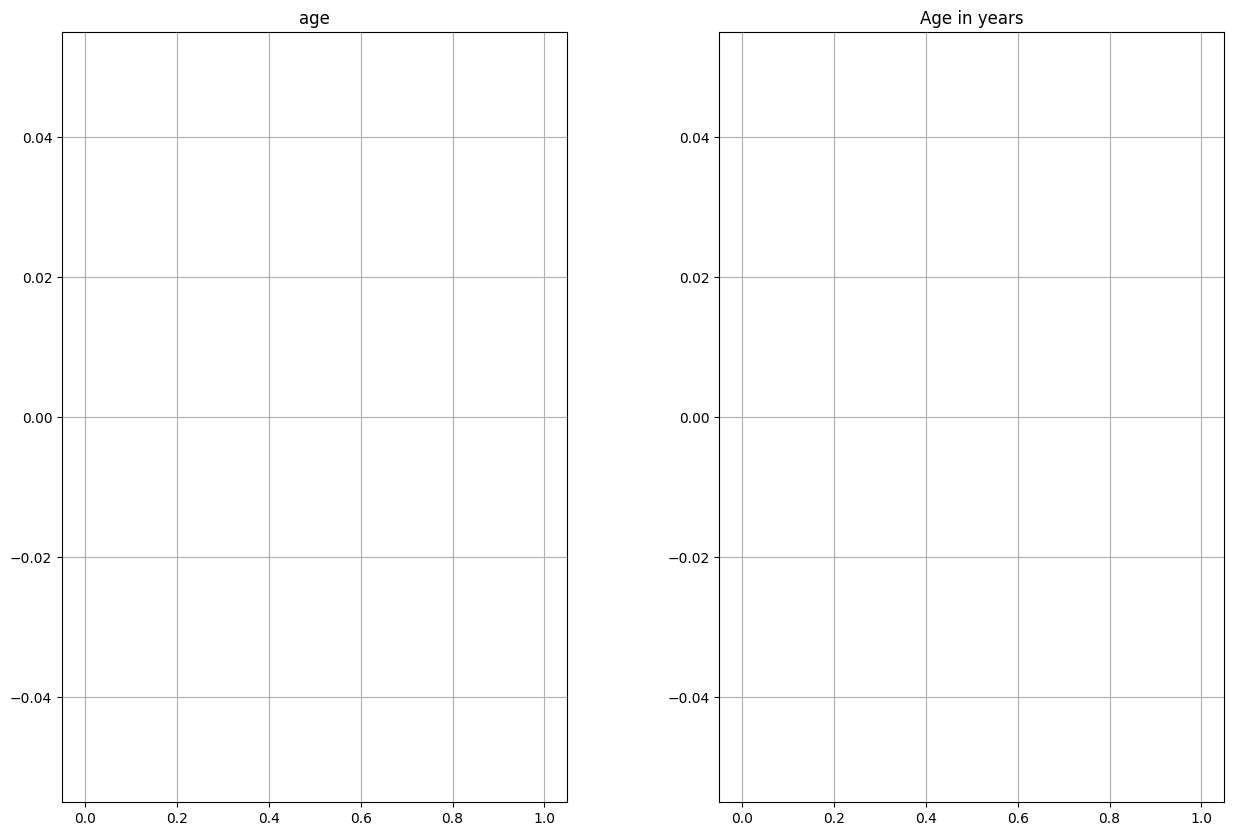

In [8]:
# Plot histograms
df.hist(bins=30, figsize=(15, 10))
plt.show()
